# Importing Python Libraries

In [1]:
# Standard anaconda Python imports
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split

In [2]:
# Additional imports to process the request to ABN lookup service. Don't need to import if using the files in /data
import urllib                        # Import from https://pypi.org/project/urllib3/
import xml.etree.ElementTree as ET   # Import from https://pypi.org/project/elementpath/

In [3]:
# in order to perform statistical analysis proving statistical significance of growth rates.
import pymannkendall as mk           # Import from https://pypi.org/project/pymannkendall/

In [4]:
# Setting the colour pallete so the graphs look pretty
sns.set_palette(sns.color_palette("Spectral", 8))
# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Skip All The Preprocessing and Just Use the Data

Importing the AIS data from Excel takes a long time, as does using the ABN lookup, so if you want to skip those steps and just use the data run the block below and skip to analysis. The code shows how these files are generated.

Note that the ABN lookup data was partially replaced by manual corrections from the Excel of group ABNs (DOAA 2012). This was manually put together, so you won't find code explaining how it was made. I used the ABN lookup list and the ABNs in the DOAA and crossreferenced them. If they were different, I usually used the ABN in the DOAA, unless the DOAA ABN was incorrect or missing and the ABN Lookup found the correct ABN.

In [33]:
# Reading the various ais data. Column names have been standardised and useless data has been dropped
df_ais19 = pd.read_csv('data/df_ais19.csv')
df_ais18 = pd.read_csv('data/df_ais18.csv')
df_ais17 = pd.read_csv('data/df_ais17.csv')
df_ais16 = pd.read_csv('data/df_ais16.csv')
df_ais15 = pd.read_csv('data/df_ais15.csv')
df_ais14 = pd.read_csv('data/df_ais14.csv')
df_ais13 = pd.read_csv('data/df_ais13.csv')

# This CSV contains all the AIS data of all non-profit groups.
df_ais   = pd.read_csv('data/df_ais.csv')

# This CSV contains the Interest Group ABN data pulled directly from the ABN Lookup service.
# It was replaced by the manually compiled csv that uses ABN Lookup and the DOAA 2012 data.
df_abn   = pd.read_csv('data/abns.csv', index_col=0)

# The list of interest groups from Wattle, combined with their ABNs.
df_ig_abn_unclean = pd.read_csv('data/List of Interest Groups with ABN.csv', index_col = 'uniqid')

# Same as above, but with groups that are missing an ABN dropped from the data frame.
df_ig_abn  = pd.read_csv('data/df_ig_abn_clean.csv', index_col = 'uniqid')

# Contains all the AIS data available on all of the groups in the IG list
df_unclean = pd.read_csv('data/IG Over Time.csv',index_col=0)

# Same as above, but removes outliers and IGs with less than 7 years of data. Is the main analysis table
df = pd.read_csv('data/IG Over Time Clean.csv',index_col=0)

# Getting AIS Data From Excel

### Importing all the ACNC AIS yearly excels

All AIS data downloaded from data.gov.au:

https://data.gov.au/search?organisation=Australian%20Charities%20and%20Not-for-profits%20Commission%20%28ACNC%29&q=Annual%20Information%20Statement



In [ ]:
# 2013 DF
df_ais13 = pd.read_excel('data/datadotgov_ais13.xlsx')

In [ ]:
df_ais13 = df_ais13[['ABN',
                'Charity_Name',
                'Main_Activity',
                'Charity_Size',
                'Staff___Full_time',
                'Staff___Part_time',
                'Staff___Volunteers']]

In [ ]:
# 2014 DF
df_ais14 = pd.read_excel('data/datadotgov_ais14.xlsx')

In [ ]:
df_ais14 = df_ais14[['ABN',
                'Charity_Name',
                'Main_Activity',
                'Charity_Size',
                'Staff___Full_time',
                'Staff___Part_time',
                'Staff___Volunteers',
                'Staff___Casual',
                'Government_grants',
                'Donations_and_bequests',
                'Other_income',
                'Total_revenue',
                'All_other_revenue',
                'Total_gross_income',
                'Employee_expenses',
                'Interest_expenses',
                'Grants_and_donations_made_for_use_in_Australia',
                'Grants_and_donations_made_for_use_outside_Australia',
                'All_other_expenses',
                'Total_expenses',
                'Net_surplus_deficit',
                'Total_current_assets',
                'Other_non_current_assets',
                'Total_non_current_assets',
                'Total_assets',
                'Total_current_liabilities',
                'Total_non_current_liabilities',
                'Total_liabilities',
                'Net_assets_liabilities']]

In [ ]:
# 2015 DF
df_ais15 = pd.read_excel('data/datadotgov_ais15.xlsx')

In [ ]:
df_ais15 = df_ais15[['ABN',
                'Charity_Name',
                'Main_Activity',
                'Charity_Size',
                'Staff_Full_time',
                'Staff___Part_time',
                'Staff_Volunteers',
                'Staff___Casual',
                'Government_grants',
                'Donations_and_bequests',
                'Other_income',
                'Total_revenue',
                'All_other_revenue',
                'Total_gross_income',
                'Employee_expenses',
                'Interest_expenses',
                'Grants_and_donations_made_for_use_in_Australia',
                'Grants_and_donations_made_for_use_outside_Australia',
                'All_other_expenses',
                'Total_expenses',
                'Net_surplus_deficit',
                'Total_current_assets',
                'Other_non_current_assets',
                'Total_non_current_assets',
                'Total_assets',
                'Total_current_liabilities',
                'Total_non_current_liabilities',
                'Total_liabilities',
                'Net_assets_liabilities']]

In [ ]:
# 2016 DF
df_ais16 = pd.read_excel('data/datadotgov_ais16.xlsx')

In [ ]:
df_ais16 = df_ais16[['ABN',
                'Charity Name',
                'Main Activity',
                'Charity Size',
                'Staff Full time',
                'Staff___Part_time',
                'Staff___Casual',
                'Staff Volunteers',
                'Government grants',
                'Donations and bequests',
                'Other income',
                'Total revenue',
                'All other revenue',
                'Total gross income',
                'Employee expenses',
                'Interest expenses',
                'Grants and donations made for use in Australia',
                'Grants and donations made for use outside Australia',
                'All other expenses',
                'Total expenses',
                'Net surplus/deficit',
                'Total current assets',
                'Other non-current assets',
                'Total non-current liabilities',
                'Total assets',
                'Total current liabilities',
                'Total non-current liabilities',
                'Total liabilities',
                'Net assets/liabilities']]

In [ ]:
# 2017 DF
df_ais17 = pd.read_excel('data/datadotgov_ais17.xlsx')

In [ ]:
df_ais17 = df_ais17[['abn',
                     'charity name',
                     'main activity',
                     'charity size',
                     'staff - full time',
                     'staff - part time',
                     'staff - casual',
                     'total full time equivalent staff',
                     'staff - volunteers',
                     'revenue from government',
                     'donations and bequests',
                     'other income',
                     'total revenue',
                     'all other revenue',
                     'total gross income',
                     'employee expenses',
                     'interest expenses',
                     'grants and donations made for use in Australia',
                     'grants and donations made for use outside Australia',
                     'all other expenses',
                     'total expenses',
                     'net surplus/deficit',
                     'total current assets',
                     'other non-current assets',
                     'total non-current liabilities',
                     'total assets',
                     'total current liabilities',
                     'total non-current liabilities',
                     'total liabilities',
                     'net assets/liabilities']]

In [ ]:
# 2018 DF
df_ais18 = pd.read_excel('data/datadotgov_ais18.xlsx')

In [ ]:
df_ais18 = df_ais18[['abn',
                     'charity name',
                     'main activity',
                     'charity size',
                     'staff - full time',
                     'staff - part time',
                     'staff - casual',
                     'total full time equivalent staff',
                     'staff - volunteers',
                     'revenue from government',
                     'donations and bequests',
                     'other income',
                     'total revenue',
                     'all other revenue',
                     'total gross income',
                     'employee expenses',
                     'interest expenses',
                     'grants and donations made for use in Australia',
                     'grants and donations made for use outside Australia',
                     'all other expenses',
                     'total expenses',
                     'net surplus/deficit',
                     'total current assets',
                     'other non-current assets',
                     'total non-current liabilities',
                     'total assets',
                     'total current liabilities',
                     'total non-current liabilities',
                     'total liabilities',
                     'net assets/liabilities']]

In [ ]:
# 2019 DF
df_ais19 = pd.read_excel('data/datadotgov_ais19.xlsx')

In [ ]:
df_ais19 = df_ais19[['abn',
                     'charity name',
                     'main activity',
                     'charity size',
                     'staff - full time',
                     'staff - part time',
                     'staff - casual',
                     'total full time equivalent staff',
                     'staff - volunteers',
                     'revenue from government',
                     'donations and bequests',
                     'other income',
                     'total revenue',
                     'all other revenue',
                     'total gross income',
                     'employee expenses',
                     'interest expenses',
                     'grants and donations made for use in Australia',
                     'grants and donations made for use outside Australia',
                     'all other expenses',
                     'total expenses',
                     'net surplus/deficit',
                     'total current assets',
                     'other non-current assets',
                     'total non-current liabilities',
                     'total assets',
                     'total current liabilities',
                     'total non-current liabilities',
                     'total liabilities',
                     'net assets/liabilities']]

### Pre Processing

In [ ]:
# Renamimg columns for consistency
# Left hand side contains all names for the variable in the AISs. Right Hand Side contains name in final dataframe
col_names = {'abn':'ABN',
             'Charity_Name':'Name',
             'charity name':'Name',
             'Charity Name':'Name',
             'Main Activity':'Main activity',
             'Charity Size':'Charity size',
             'Staff Full time':'Full time staff',
             'Main_Activity':'Main activity',
             'main_activity':'Main activity',
             'Main_activity':'Main activity',
             'main activity':'Main activity',
             'Charity_Size':'Charity size',
             'charity size':'Charity size',
             'Charity_size' : 'Charity size',
             'Staff___Full_time':'Full time staff',
             'Staff___Part_time':'Part time staff',
             'Staff___Volunteers':'Volunteers',
             'Staff Volunteers':'Volunteers',
             'Staff___Casual':'Casual staff',
             'Staff_Volunteers':'Volunteers',
             'Staff_Full_time':'Full time staff',
             'staff - full time':'Full time staff',
             'staff - part time':'Part time staff',
             'staff - casual':'Casual staff',
             'staff - volunteers':'Volunteers',
             'Government grants': 'Revenue from government',
             'Government_grants' : 'Revenue from government',
             'revenue from government':'Revenue from government',
             'Donations and bequests': 'Donations and bequests',
             'Other income': 'Other income',
             'Total revenue': 'Total revenue',
             'All other revenue': 'All other revenue',
             'Total gross income': 'Total gross income',
             'Employee expenses': 'Employee expenses',
             'Interest expenses': 'Interest expenses',
             'Grants and donations made for use in Australia': 'Grants and donations made for use in australia',
             'Grants and donations made for use outside Australia': 'Grants and donations made for use outside australia',
             'grants and donations made for use in Australia': 'Grants and donations made for use in australia',
             'grants and donations made for use outside Australia':'Grants and donations made for use outside australia',
             'All other expenses': 'All other expenses',
             'Total expenses': 'Total expenses',
             'Net surplus/deficit': 'Net surplus deficit',
             'net surplus/deficit':'Net surplus deficit',
             'Total current assets': 'Total current assets',
             'Other non-current assets': 'Other non current assets',
             'Total non-current liabilities': 'Total non current liabilities',
             'Total assets': 'Total assets',
             'Total current liabilities': 'Total current liabilities',
             'Total liabilities': 'Total liabilities',
             'net assets/liabilities' : 'Net assets liabilities',
             'Net assets/liabilities': 'Net assets liabilities',
             'total full time equivalent staff':'Total full time equivalent staff',
             'donations and bequests':'Donations and bequests',
             'other income':'Other income',
             'total revenue':'Total revenue',
             'all other revenue':'All other revenue',
             'total gross income': 'Total gross income',
             'employee expenses': 'Employee expenses',
             'interest expenses': 'Interest expenses',
             'all other expenses':'All other expenses',
             'total expenses':'Total expenses',
             'total current assets':'Total current assets',
             'other non-current assets':'Other non current assets',
             'total non-current liabilities':'Total non current liabilities',
             'total assets':'Total assets',
             'total current liabilities':'Total current liabilities',
             'total non-current liabilities':'Total non current liabilities',
             'total liabilities':'Total liabilities','Donations_and_bequests': 'Donations and bequests',
             'Other_income': 'Other income',
             'Total_revenue': 'Total revenue',
             'All_other_revenue': 'All other revenue',
             'Total_gross_income': 'Total gross income',
             'Employee_expenses': 'Employee expenses',
             'Interest_expenses': 'Interest expenses',
             'Grants_and_donations_made_for_use_in_Australia': 'Grants and donations made for use in australia',
             'Grants_and_donations_made_for_use_outside_Australia': 'Grants and donations made for use outside australia',
             'All_other_expenses': 'All other expenses',
             'Total_expenses': 'Total expenses',
             'Net_surplus_deficit': 'Net surplus deficit',
             'Total_current_assets': 'Total current assets',
             'Other_non_current_assets': 'Other non current assets',
             'Total_non_current_assets': 'Total non current assets',
             'Total_assets': 'Total assets',
             'Total_current_liabilities': 'Total current liabilities',
             'Total_non_current_liabilities': 'Total non current liabilities',
             'Total_liabilities': 'Total liabilities',
             'Net_assets_liabilities': 'Net assets liabilities'}


In [ ]:
df_ais13.rename(columns=col_names, inplace=True)
df_ais14.rename(columns=col_names, inplace=True)
df_ais15.rename(columns=col_names, inplace=True)
df_ais16.rename(columns=col_names, inplace=True)
df_ais17.rename(columns=col_names, inplace=True)
df_ais18.rename(columns=col_names, inplace=True)
df_ais19.rename(columns=col_names, inplace=True)

In [ ]:
# Exporting AIS to csvs with correct column names.
df_ais13.to_csv(r'data/df_ais13.csv', index = False)
df_ais14.to_csv(r'data/df_ais14.csv', index = False)
df_ais15.to_csv(r'data/df_ais15.csv', index = False)
df_ais16.to_csv(r'data/df_ais16.csv', index = False)
df_ais17.to_csv(r'data/df_ais17.csv', index = False)
df_ais18.to_csv(r'data/df_ais18.csv', index = False)
df_ais19.to_csv(r'data/df_ais19.csv', index = False)

### Further Tidying

In [ ]:
# The 2014 data used plain text to collect number of volunteers, which needs to be changed to an integer.
# I have chosen to use the middle value when given a range.
# This may account for the lower variation and lower number of volunteers in 2014.

Vol_replace = {'Volunteers':{'11TO50':'30',
               '11-50':'30',
               '011-50':'30',
               '11 - 50':'30',
               '11to50':'30',
               '11-15':'13',
               '1TO10':'6',
               '1 -10':'6',
               '5-11':'8',
               '5-10':'8',
               '1-10':'6',
               '40+':'41',           
               '51TO100':'76',
               '51-100':'76',
               '0TO50':'25',
               '+100':'101',              
               '101TO500':'301',
               '101-500':'301',
               '101 to 500':'301',
               'Over 100':'100',
               'OVER1000':'1001',
               '501TO1000':'751',
               '501-1000':'751'}}

df_ais13.replace(Vol_replace, inplace = True)
df_ais13['Volunteers'] = pd.to_numeric(df_ais13['Volunteers'],errors = 'coerce',downcast='integer').fillna(-1).astype(int)


df_ais14.replace(Vol_replace, inplace = True)
df_ais14['Volunteers'] = pd.to_numeric(df_ais14['Volunteers'],errors = 'coerce',downcast='integer').fillna(-1).astype(int)

df_ais15.replace(Vol_replace, inplace = True)
df_ais15['Volunteers'] = pd.to_numeric(df_ais15['Volunteers'],errors = 'coerce',downcast='integer').fillna(-1).astype(int)


df_ais16.replace(Vol_replace, inplace = True)
df_ais16['Volunteers'] = pd.to_numeric(df_ais16['Volunteers'],errors = 'coerce',downcast='integer').fillna(-1).astype(int)


df_ais17.replace(Vol_replace, inplace = True)
df_ais17['Volunteers'] = pd.to_numeric(df_ais17['Volunteers'],errors = 'coerce',downcast='integer').fillna(-1).astype(int)

In [ ]:
df_ais13['Year'] = "2013"
df_ais14['Year'] = "2014"
df_ais15['Year'] = "2015"
df_ais16['Year'] = "2016"
df_ais17['Year'] = "2017"
df_ais18['Year'] = "2018"
df_ais19['Year'] = "2019"

In [ ]:
df_ais = pd.concat([df_ais13,df_ais14,df_ais15,df_ais16,df_ais17,df_ais18,df_ais19])
df_ais.drop(['Total non current liabilities','Total non current liabilities.1'], axis=1,inplace=True)
df_ais.to_csv(r'data/df_ais.csv', index = False)

## Interest Groups List from Wattle

### Importing

In [ ]:
# Downloaded from list posted on Wattle
df_ig = pd.read_csv('data/List of Australian Interest Groups.csv')
df_ig.rename({'name':'Name'},axis =1, inplace=True)

### Linking with ABN using Aus Gov. ABN Lookup
This process automatically searches the group's name up using the Australian Government's ABN lookup service. Because this wasn't always accurate it was manually checked against the data from the DOAA in 2012. The ABNs used in the analysis are imported from ***List of Interest Groups with ABN.csv*** which was manually compiled using ABN lookup data and the DOAA 2012 data, so there is no point running the blocks below. I have kept them for reference.

In [ ]:
# The ABN lookup 

# a API key for the Australian Government's ABN lookup service is required. This is free
# https://abr.business.gov.au/Tools/WebServices
# Once you have a key, replace the variable below.
authenticationGuid = 'API-KEY-HERE-REPLACE-ME'

def Clean(x):
    # Input SQL Statement, outputs SQL statement in format for URL
    x = x.replace('    ','')
    x = x.replace('\n','%20')
    x = x.replace(' ','%20')
    x = x.replace('%20*%20','*')
    x = x.replace('"', '%22')
    return x

def Decode(x):
    # Input URL SQL result, output dictionary of results
    x = x.decode("UTF-8")
    return x

def ToURL(x):
    url =   ('https://abr.business.gov.au/abrxmlsearchRPC/AbrXmlSearch.asmx/' +
            'ABRSearchByNameAdvancedSimpleProtocol2017?name=' + 
             x + 
            '&postcode=''&legalName=''&tradingName=''&businessName=''&activeABNsOnly=' + 
            '&NSW=''&SA=''&ACT=''&VIC=''&WA=''&NT=''&QLD=''&TAS=''&limit=1&authenticationGuid=' + 
             authenticationGuid + 
            '&searchWidth=&minimumScore=&maxSearchResults=1')
    return url

def Search(x):
    # From https://github.com/ABN-SFLookupTechnicalSupport
    conn = urllib.request.urlopen(x)
    returnedXML = conn.read()
    f = open('output.xml', 'wb')
    f.write(returnedXML)
    f.close
    return returnedXML

def ToXML(x):
    x = ET.fromstring(x)
    return x

def XMLToFirstABN(x):
    if x[1][2].tag == '{http://abr.business.gov.au/ABRXMLSearchRPC/literalTypes}exception':
        return float('NaN')
    else:
        abn  = x[1][3][2][0][0].text
        stat = x[1][3][2][0][1].text
        name = x[1][3][2][1][0].text
        score = x[1][3][2][1][1].text
        return (abn,stat,name,score)

def SearchTermToABN(x):
    return XMLToFirstABN(ToXML(Decode(Search(ToURL(Clean(x))))))


In [ ]:
IGs  = list(df_ig.Name)
ABNs = []

In [ ]:
for group in IGs[:300]:
    ABNs.append(SearchTermToABN(group))

In [ ]:
for group in IGs[300:600]:
    ABNs.append(SearchTermToABN(group))

In [ ]:
for group in IGs[600:900]:
    ABNs.append(SearchTermToABN(group))

In [ ]:
for group in IGs[900:1200]:
    ABNs.append(SearchTermToABN(group))

In [ ]:
for group in IGs[1200:]:
    ABNs.append(SearchTermToABN(group))

In [ ]:
df_abn = pd.DataFrame(ABNs, columns = ['ABN','ABN status','ABN lookup name','ABN lookup score'], dtype='float64')

In [ ]:
df_abn.to_csv('data/abns.csv')

### Merging ABN Lookup with IG Data


In [ ]:
df_ig_abn = pd.concat([df_ig,df_abn],axis = 1)
df_ig_abn.set_index('uniqid', inplace=True)

In [ ]:
# Corrections needed in the ABN Lookup Data that prompted the need for the use of DOAA data
# Entering in beyond blue data that is missing:
df_ig_abn.drop(753, inplace=True)
beyondblue = pd.DataFrame([
        (753,
         'Beyondblue: The National Depression Initiative',
         'Citizen group',
         40,
         2000,
         'VIC',
         '',
         'disabled and health advocacy',
         47094561887,
         'Active',
         'BEYOND BLUE AUSTRALIA PTY LTD',
         100)],
    columns = ['uniqid'] + list(df_ig_abn.columns))
beyondblue.set_index('uniqid', inplace=True)

# Adding in correct friends of the earth ABN - mismatched:
df_ig_abn.drop(1062, inplace = True)
fote = pd.DataFrame([
    (1062, 
    'Friends of the Earth',
    'Citizen group',
    '',
    1974,
    'VIC',
    '',
    'public interest',
    18110769501,
    'Active',
    'FRIENDS OF EARTH',
    100)],
    columns = ['uniqid'] + list(df_ig_abn.columns))
fote.set_index('uniqid', inplace=True)

# Adding in correct Research Australia ABN - mismatched:
df_ig_abn.drop(1493, inplace = True)
ra = pd.DataFrame([
    (1493, 
    'Research Australia',
    'Business association',
    '6',
    2001,
    'VIC',
    'professional scientific and technical activities',
    'business organization',
    28095324379,
    'Active',
    'RESEARCH AUSTRALIA LIMITED',
    100)],
    columns = ['uniqid'] + list(df_ig_abn.columns))
ra.set_index('uniqid', inplace=True)


# One other organisation not matched - Nikoninc

# merging with rest of data set
df_ig_abn_lookup = pd.concat([df_ig_abn,beyondblue,fote,ra])
df_ig_abn_lookup.sort_index(inplace=True)

# Exporting
df_ig_abn_lookup.to_csv('data/ABN lookup list of interest groups.csv')

# Importing Manually Compiled Interest Group ABN Data

In [ ]:
df_ig_abn_unclean = pd.read_csv('data/List of Interest Groups with ABN.csv')
df_ig_abn = df_ig_abn_unclean.set_index('uniqid')

# Dropping rows without an ABN associated
df_ig_abn.dropna(subset=['ABN'], inplace=True)
df_ig_abn['ABN'] = df_ig_abn['ABN'].astype(int)

In [ ]:
df_ig_abn.to_csv('data/df_ig_abn_clean.csv')

# Using SQL to Merge the AIS data with Interest Group data

In [ ]:
cd 'data'

In [ ]:
def create_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        if conn:
            conn.close()


if __name__ == '__main__':
    create_connection(r"data/ig_ais.db")

In [ ]:
cd .. 

In [ ]:
conn = sqlite3.connect(r"data/ig_ais.db")
cur = conn.cursor()
conn.commit()

In [ ]:
# Functions
def execute_sql(query):
    # Select table and display
    cur.execute(query)

    # Fetches all the rows from the result of the query
    rows = cur.fetchall()
    
    # Gets the column names for the table
    colnames = [desc[0] for desc in cur.description]

    # Converts into readable pandas dataframe
    df_result = pd.DataFrame(rows, columns=colnames)
    return df_result

def execute(query):
    cur.execute(query)

In [ ]:
# Creating ig (Interest Group Table)
execute("""DROP TABLE IF EXISTS ig""")
execute("""CREATE TABLE ig """ + str(tuple(df_ig_abn.columns)))
conn.commit()

In [ ]:
df_ig_abn.to_sql('ig',conn,if_exists='replace',index=False)

In [ ]:
# Creating ais (AIS table)
execute("""DROP TABLE IF EXISTS ais""")
execute("""CREATE TABLE ais """ + str(tuple(df_ais.columns)))
conn.commit()

In [ ]:
df_ais.to_sql('ais',conn,if_exists='replace',index=False)

### Dropping rows that aren't in both tables

In [ ]:
execute(  """DELETE FROM ig 
             WHERE NOT EXISTS(  SELECT NULL
                                FROM ais
                                WHERE ais.ABN = ig.ABN)""")
execute(  """DELETE FROM ais 
             WHERE NOT EXISTS(  SELECT NULL
                                FROM ig
                                WHERE ig.ABN = ais.ABN)""")

In [ ]:
# Checking that every row in AIS has a connected IG
execute_sql(""" SELECT ais.Name, ais.ABN, ig.Name, ig.ABN
                FROM ais
                LEFT JOIN ig on ig.ABN ==ais.ABN
                WHERE ig.ABN is Null""")

In [ ]:
# Checking that every IG has at least one connected year of AIS data
execute_sql(""" SELECT ais.Name, ais.ABN, ig.Name, ig.ABN
                FROM ig
                LEFT JOIN ais on ais.ABN ==ig.ABN
                WHERE ais.ABN is Null""")

### Joining tables

In [ ]:
df_unclean = execute_sql("""SELECT  ais.ABN, ais.Name, ais.'Main activity', ais.'Full time staff', ais.'Part time staff', 
                        ais.'Volunteers', ais.'Year', ais.'Casual staff', ais.'Total revenue', 
                        ais.'Total gross income', ais.'Employee expenses', ais.'All other expenses', 
                        ais.'Total expenses', ais.'Net surplus deficit', ig.'type', ig.'cat1_1', ig.'formed_combined2'
                    FROM ais
                    LEFT JOIN ig on ig.ABN == ais.ABN
                    ORDER BY ais.ABN, Year ASC""")

In [ ]:
df_unclean.to_csv('data/IG Over Time.csv')
conn.commit()

## Cleaning Data

In [ ]:
# Removing outliers (eg. Clean Up Australia has 100,000s of volunteers). 
# Data is also messy with some organisations likely over reporting staff.
# With outliers is 2478 rows
# Without outliers is 2418 rows
df = df_unclean[(np.abs(stats.zscore(df_unclean['Volunteers'])) < 3)]
df = df[(np.abs(stats.zscore(df['Full time staff'])) < 3)]
df = df[(np.abs(stats.zscore(df['Part time staff'])) < 3)]

In [ ]:
# Dropping all organisations without 7 years worth of data
df = df.groupby((df.shift() != df).ABN.cumsum())\
     .filter(lambda x: len(x) == 7)

In [ ]:
df.to_csv('data/IG Over Time Clean.csv')

# Analysis

In [6]:
df_year = df.groupby(by='Year')
df_org  = df.groupby(by='Name')
df_type = df.groupby(by='type')

## Number and type of observations

In [7]:
# Interest group data as a whole
df_ig_type = df_ig_abn_unclean.groupby('type')
df_ig_type = pd.DataFrame(df_ig_type.Name.count())
df_ig_type['Type'] = df_ig_type.index
df_ig_type['Observations'] = df_ig_type['Name']

df_ig_type.reset_index(inplace=True)
df_ig_type.index.rename('Index', inplace = True)
df_ig_type['i'] = df_ig_type.index

df_all_obs = pd.DataFrame()
df_all_obs['Type'] = df_ig_type['Type']

# Just those in the AIS data
df_obs = pd.DataFrame(df_type.Year.count())
df_obs['Observations'] = (df_obs['Year']/7).astype(int)
df_obs['Type']=df_obs.index

df_obs.reset_index(inplace=True)
df_obs.index.rename('Index', inplace = True)
df_obs['i'] = df_obs.index

# No trade unions so have to manually add in a trade Union column as 0
TradeUnion = pd.DataFrame([('Trade union',0,0,'Trade union',7)], columns=df_obs.columns)
df_obs = pd.concat([df_obs,TradeUnion])
df_obs.reset_index(inplace=True)

df_all_obs['Analysed'] = df_obs['Observations']
df_all_obs['Present in Australia'] = df_ig_type['Observations']
df_all_obs.index = df_all_obs['Type']
df_all_obs.drop('Type', axis =1, inplace = True)
df_all_obs

,Analysed,Present in Australia
Type,,
Business association,25,494
Citizen group,105,217
Hybrid group,32,58
Institutional group,15,25
Leisure group,25,194
Professional group,63,397
Service Group,81,134
Trade union,0,26


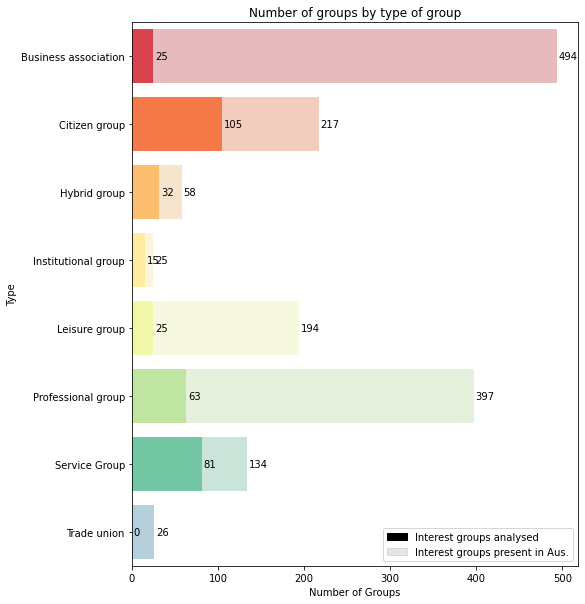

In [8]:
# As a chart, first all observations
plt.figure(figsize=(8,10))
ax2 =sns.barplot(x='Observations', y='Type', data = df_ig_type, orient = 'h', alpha = 0.4)
for index, row in df_ig_type.iterrows():
    ax2.text(row.Observations+ 2,row.i, row.Observations, color='black', ha="left", va="center")

#Plotting just those in the AIS data
ax2 = sns.barplot(x='Observations',y='Type',data=df_obs, orient = 'h', saturation = 1)
ax2.set(xlabel='Number of Groups', ylabel='Type', title = 'Number of groups by type of group')
for index, row in df_obs.iterrows():
    ax2.text(row.Observations+ 2,row.i, row.Observations, color='black', ha="left", va="center")

# Legend
nonsat = mpatches.Patch(color='black', label='Interest groups analysed')
sat = mpatches.Patch(color='black', alpha = 0.1, label='Interest groups present in Aus.')
plt.legend(handles=[nonsat,sat])
plt.show()

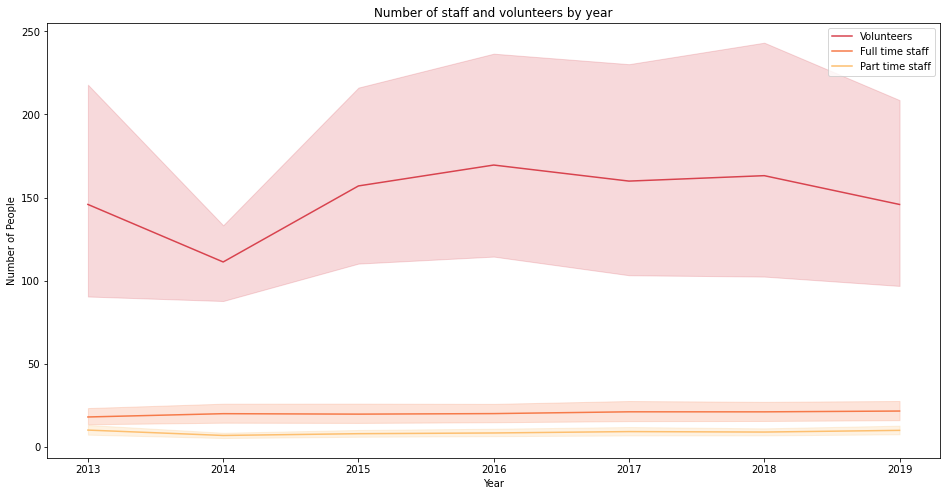

In [9]:
# Staff and volunteer data over time
plt.figure(figsize=(16,8))
ax1 = sns.lineplot(x='Year',y='Volunteers',data=df)
ax1 = sns.lineplot(x='Year',y='Full time staff', data=df)
ax1 = sns.lineplot(x='Year',y='Part time staff', data=df)
plt.legend(['Volunteers','Full time staff','Part time staff'])
ax1.set(xlabel='Year', ylabel='Number of People', title = 'Number of staff and volunteers by year')

plt.show()

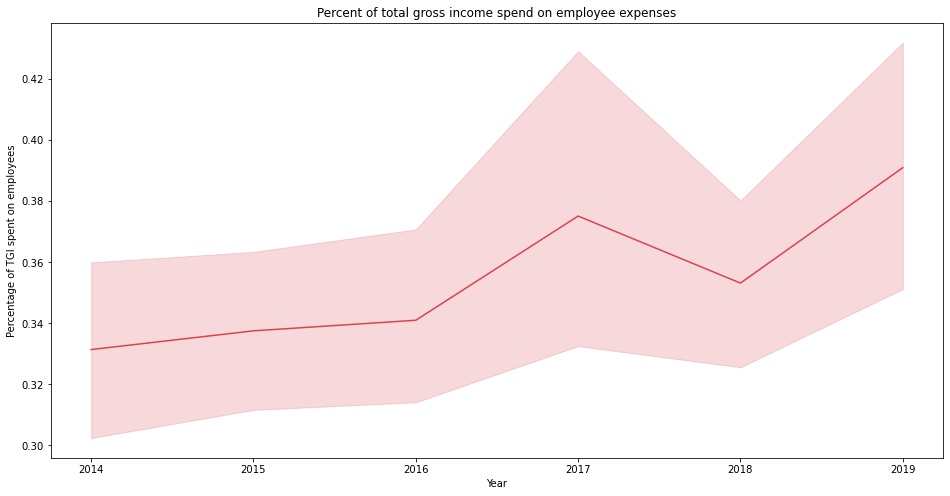

In [10]:
# Perfecntage of TGI spent on employees over tiem
df['Percentage of TGI spent on employees'] = df['Employee expenses'] / df['Total gross income']

plt.figure(figsize=(16,8))

sns.lineplot(x= 'Year',y = 'Percentage of TGI spent on employees', data = df)
plt.title('Percent of total gross income spend on employee expenses')
plt.show()

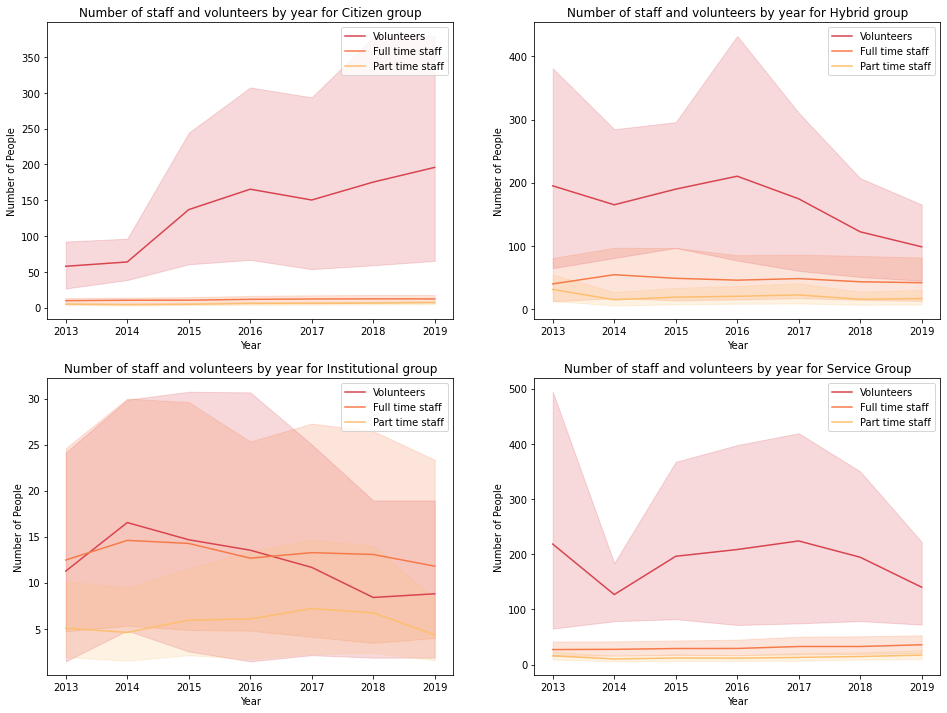

In [11]:
# Comparing trends accross IG types
plt.figure(figsize = (16,12))

type_num_dict = {'Citizen group':1,
                 'Hybrid group':2,
                 'Institutional group':3,
                 'Service Group':4}

group_types_of_interest = ['Citizen group','Hybrid group','Institutional group','Service Group']

for i in group_types_of_interest:
    plt.subplot(2,2,type_num_dict[i])
    ax1 = sns.lineplot(x='Year',y = 'Volunteers', data = df[df.loc[:,'type'] == i])
    ax1 = sns.lineplot(x='Year',y = 'Full time staff', data = df[df.loc[:,'type'] == i])
    ax1 = sns.lineplot(x='Year',y = 'Part time staff', data = df[df.loc[:,'type'] == i])
    plt.legend(['Volunteers','Full time staff','Part time staff'])
    ax1.set(xlabel='Year', ylabel='Number of People', title = 'Number of staff and volunteers by year for ' + i)
plt.show()

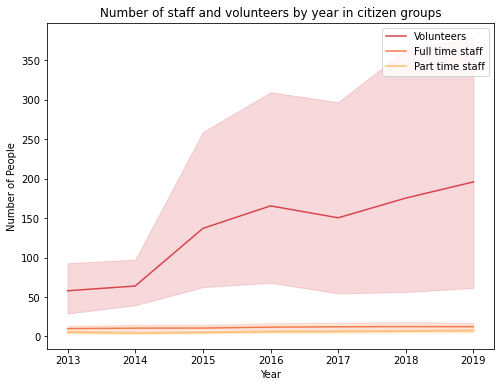

In [12]:
# Looking just at citizen groups
plt.figure(figsize = (8,6))
ax1 = sns.lineplot(x='Year',y = 'Volunteers', data = df[df.loc[:,'type'] == 'Citizen group'])
ax1 = sns.lineplot(x='Year',y = 'Full time staff', data = df[df.loc[:,'type'] == 'Citizen group'])
ax1 = sns.lineplot(x='Year',y = 'Part time staff', data = df[df.loc[:,'type'] == 'Citizen group'])
plt.legend(['Volunteers','Full time staff','Part time staff'])
ax1.set(xlabel='Year', ylabel='Number of People', title = 'Number of staff and volunteers by year in citizen groups')
plt.show()

In [13]:
# Looking at specific organisations in the citizen group category
orgs = ['Greening Australia Ltd',
'The Leukaemia Foundation Of Australia Limited',
'Create Foundation Limited']

def HighlightName(x):
    if x in orgs:
        return x
    else:
        return 'All others'

df_citizen = df[df.loc[:,'type'] == 'Citizen group']
df_citizen['Name 2'] = df.Name.apply(HighlightName)


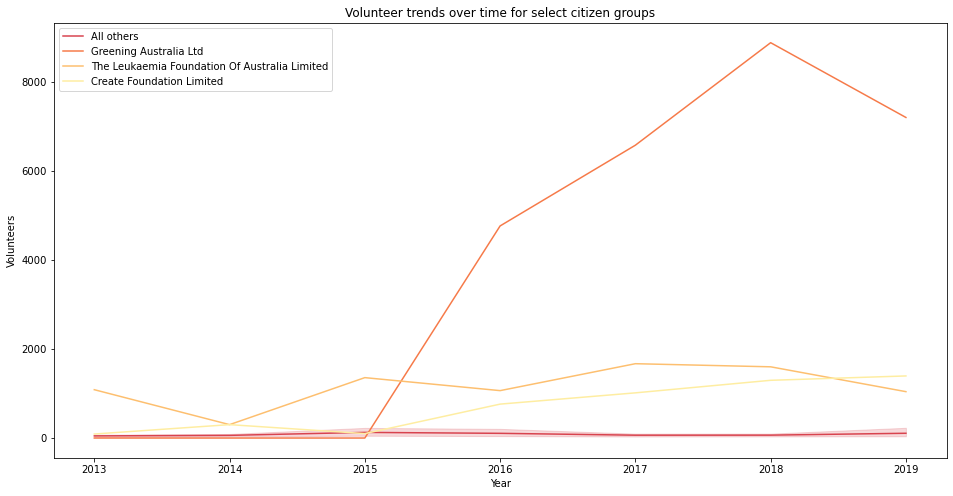

In [14]:
plt.figure(figsize=(16,8))
sns.lineplot(x = 'Year', y = 'Volunteers', hue = 'Name 2', data = df_citizen)
plt.title('Volunteer trends over time for select citizen groups')
plt.legend()
plt.show()

In [15]:
# Mean full time staff members by interest groups
df_type['Full time staff'].mean()

type
Business association    11.240000
Citizen group           11.374150
Hybrid group            45.986607
Institutional group     13.161905
Leisure group            2.011429
Professional group      20.938776
Service Group           30.679012
Name: Full time staff, dtype: float64

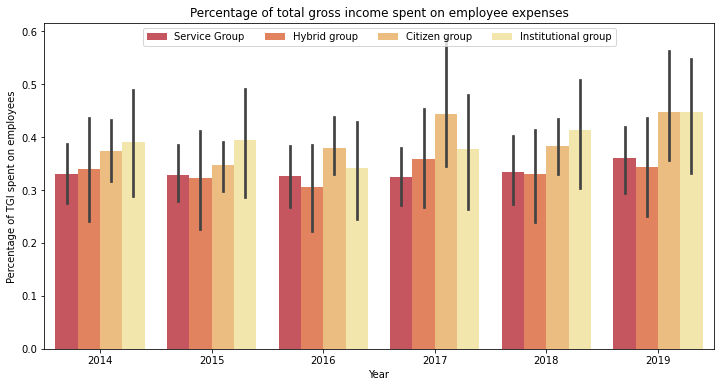

In [16]:
df_goi = df.loc[df['type'].isin(group_types_of_interest)]
df_goi = df_goi[df_goi['Year'] != 2013]

plt.figure(figsize = (12,6))
sns.barplot(x = 'Year',y = 'Percentage of TGI spent on employees', hue = 'type',data = df_goi)
plt.title('Percentage of total gross income spent on employee expenses')
plt.legend(loc = 'upper center', ncol = 4)

plt.show()

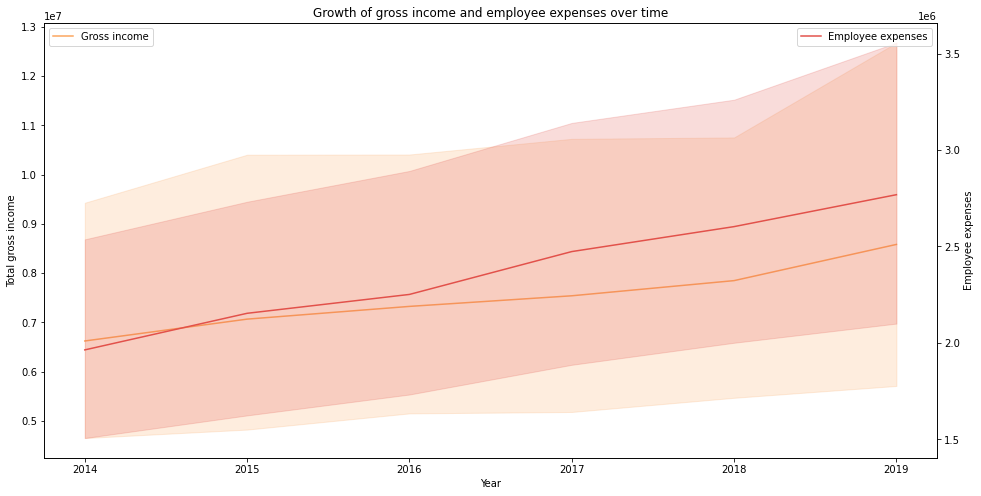

In [17]:
# Increase in employee expenses in comparison to gross income
plt.figure(figsize= (16,8))
sns.lineplot(x = 'Year', y = 'Total gross income', data = df, color = sns.color_palette("Spectral")[1])
plt.legend(['Gross income'], loc = 'upper left')
ax2 = plt.twinx()
sns.lineplot(x = 'Year', y = 'Employee expenses', data = df, ax = ax2, color = sns.color_palette("Spectral")[0])
plt.legend(['Employee expenses'])
plt.title('Growth of gross income and employee expenses over time')
plt.show()



## Mann Kendall and Growth Rate Statistics
### Full time staff

In [18]:
df_grth = df[['Full time staff', 'Year']]
df_grth = df_grth.groupby('Year')
df_grth = df_grth.mean()
sigtest = mk.original_test(df_grth)
print('Full time staff:')
if sigtest.p < 0.05:
    print(f'{sigtest.trend} trend is statistically significant')
else:
    print('no statistically significant trend')

Full time staff:
increasing trend is statistically significant


In [19]:
df_grth = df[['Full time staff', 'type','Year']]
df_grth = df_grth.pivot_table(index = 'type', columns = 'Year', values = 'Full time staff')
df_grth['Average Annual Growth'] = (
    ((df_grth[2014] / df_grth[2013] - 1) +
    (df_grth[2015] / df_grth[2014] - 1) +
    (df_grth[2016] / df_grth[2015] - 1) +
    (df_grth[2017] / df_grth[2016] - 1) +
    (df_grth[2018] / df_grth[2017] - 1) +
    (df_grth[2019] / df_grth[2018] - 1)) / 6)
popmean = round(df_grth['Average Annual Growth'].mean(),3)
print(f'Average annual growth rate is {popmean}')
df_grth

Average annual growth rate is 0.014


Year,2013,2014,2015,2016,2017,2018,2019,Average Annual Growth
type,,,,,,,,
Business association,11.800000,11.600000,10.760000,11.480000,10.920000,10.920000,11.200000,-0.007598
Citizen group,9.895238,10.476190,10.571429,11.733333,12.200000,12.419048,12.323810,0.037962
Hybrid group,39.875000,54.375000,48.687500,45.781250,48.218750,43.218750,41.750000,0.019152
Institutional group,12.466667,14.600000,14.266667,12.666667,13.266667,13.066667,11.800000,-0.004751
Leisure group,2.440000,1.920000,2.000000,2.040000,1.760000,1.960000,1.960000,-0.029178
Professional group,18.587302,20.349206,20.079365,21.301587,20.841270,22.857143,22.555556,0.034053
Service Group,27.222222,27.654321,29.123457,29.246914,32.777778,32.790123,35.938272,0.048391


### Part time staff

In [20]:
df_grth = df[['Part time staff', 'Year']]
df_grth = df_grth.groupby('Year')
df_grth = df_grth.mean()
sigtest = mk.original_test(df_grth)
print('Part time staff:')
if sigtest.p < 0.05:
    print(f'{sigtest.trend} trend is statistically significant')
else:
    print('no statistically significant trend')

Part time staff:
no statistically significant trend


In [21]:
df_grth = df[['Part time staff', 'type','Year']]
df_grth = df_grth.pivot_table(index = 'type', columns = 'Year', values = 'Part time staff')
df_grth['Average Annual Growth'] = (
    ((df_grth[2014] / df_grth[2013] - 1) +
    (df_grth[2015] / df_grth[2014] - 1) +
    (df_grth[2016] / df_grth[2015] - 1) +
    (df_grth[2017] / df_grth[2016] - 1) +
    (df_grth[2018] / df_grth[2017] - 1) +
    (df_grth[2019] / df_grth[2018] - 1)) / 6)
popmean = round(df_grth['Average Annual Growth'].mean(),3)
print(f'Average annual growth rate is {popmean}')
df_grth

Average annual growth rate is 0.002


Year,2013,2014,2015,2016,2017,2018,2019,Average Annual Growth
type,,,,,,,,
Business association,5.840000,4.600000,4.240000,4.640000,4.320000,4.640000,5.360000,-0.005995
Citizen group,5.009524,4.285714,4.819048,5.885714,6.047619,6.466667,7.161905,0.067602
Hybrid group,31.125000,14.687500,18.968750,20.218750,22.375000,15.500000,16.687500,-0.049121
Institutional group,5.066667,4.600000,5.933333,6.066667,7.200000,6.733333,4.333333,-0.002369
Leisure group,2.520000,1.760000,1.800000,2.320000,2.080000,1.200000,1.280000,-0.074972
Professional group,6.603175,6.555556,6.841270,6.841270,8.126984,7.682540,8.555556,0.047209
Service Group,15.827160,10.197531,11.975309,11.654321,13.098765,14.691358,17.185185,0.034518


### Volunteers

In [22]:
df_grth = df[['Volunteers', 'Year']]
df_grth = df_grth.groupby('Year')
df_grth = df_grth.mean()
sigtest = mk.original_test(df_grth)
print('Volunteers staff:')
if sigtest.p < 0.05:
    print(f'{sigtest.trend} trend is statistically significant')
else:
    print('no statistically significant trend')

Volunteers staff:
no statistically significant trend


In [23]:
df_grth = df[['Volunteers', 'type','Year']]
df_grth = df_grth.pivot_table(index = 'type', columns = 'Year', values = 'Volunteers')
df_grth['Average Annual Growth'] = (
    ((df_grth[2014] / df_grth[2013] - 1) +
    (df_grth[2015] / df_grth[2014] - 1) +
    (df_grth[2016] / df_grth[2015] - 1) +
    (df_grth[2017] / df_grth[2016] - 1) +
    (df_grth[2018] / df_grth[2017] - 1) +
    (df_grth[2019] / df_grth[2018] - 1)) / 6)
popmean = round(df_grth['Average Annual Growth'].mean(),3)
print(f'Average annual growth rate is {popmean}')
df_grth

Average annual growth rate is 0.016


Year,2013,2014,2015,2016,2017,2018,2019,Average Annual Growth
type,,,,,,,,
Business association,64.200000,73.240000,36.080000,39.280000,42.720000,42.080000,50.720000,0.000008
Citizen group,57.876190,63.923810,136.961905,165.495238,150.390476,175.390476,195.904762,0.274555
Hybrid group,195.093750,165.125000,189.906250,210.375000,174.562500,122.343750,98.562500,-0.093251
Institutional group,11.266667,16.533333,14.666667,13.533333,11.666667,8.400000,8.800000,-0.015505
Leisure group,212.920000,205.520000,225.040000,235.000000,238.440000,225.760000,225.960000,0.011138
Professional group,212.015873,142.809524,177.936508,168.238095,136.301587,183.126984,132.111111,-0.043304
Service Group,218.419753,126.938272,196.308642,208.567901,224.111111,194.592593,140.283951,-0.024362


### Total Gross Income

In [24]:
df_grth = df[['Total gross income', 'Year']]
df_grth = df_grth.groupby('Year').mean().iloc[1:]
sigtest = mk.original_test(df_grth)
print('Total gross income:')
if sigtest.p < 0.05:
    print(f'{sigtest.trend} trend is statistically significant')
else:
    print('no statistically significant trend')

Total gross income:
increasing trend is statistically significant


In [25]:
df_grth = df[['Total gross income', 'type','Year']]
df_grth = df_grth.pivot_table(index = 'type', columns = 'Year', values = 'Total gross income')
df_grth['Average Annual Growth'] = (
    ((df_grth[2015] / df_grth[2014] - 1) +
    (df_grth[2016] / df_grth[2015] - 1) +
    (df_grth[2017] / df_grth[2016] - 1) +
    (df_grth[2018] / df_grth[2017] - 1) +
    (df_grth[2019] / df_grth[2018] - 1)) / 5)
popmean = round(df_grth['Average Annual Growth'].mean(),3)
print(f'Average annual growth rate is {popmean}')
df_grth

Average annual growth rate is 0.018


Year,2014,2015,2016,2017,2018,2019,Average Annual Growth
type,,,,,,,
Business association,5.005624e+06,5.002734e+06,4.911889e+06,5.212711e+06,5.250191e+06,5.183185e+06,0.007387
Citizen group,3.437435e+06,3.714794e+06,3.681644e+06,3.952530e+06,4.165324e+06,4.396147e+06,0.050919
Hybrid group,2.036727e+07,2.299263e+07,2.312911e+07,2.338749e+07,2.312468e+07,2.913666e+07,0.078950
Institutional group,5.411073e+06,5.594172e+06,5.649369e+06,4.770980e+06,5.588540e+06,4.202317e+06,-0.037693
Leisure group,1.402147e+06,1.039749e+06,7.840635e+05,7.253417e+05,9.259929e+05,8.099560e+05,-0.085589
Professional group,5.804241e+06,5.854695e+06,6.103843e+06,6.536583e+06,7.324977e+06,7.538869e+06,0.054391
Service Group,8.282297e+06,8.820936e+06,9.817583e+06,1.003675e+07,1.034288e+07,1.095614e+07,0.058028


### Percentage of TGI spnt on employee expenses

In [26]:
df_grth = df[['Percentage of TGI spent on employees', 'Year']]
df_grth = df_grth.groupby('Year').mean().iloc[1:]
sigtest = mk.original_test(df_grth)
print('Percentage of TGI spent on employees:')
if sigtest.p < 0.05:
    print(f'{sigtest.trend} trend is statistically significant')
else:
    print('no statistically significant trend')

Percentage of TGI spent on employees:
increasing trend is statistically significant


In [27]:

df_grth = df[['Percentage of TGI spent on employees', 'type','Year']]
df_grth = df_grth.pivot_table(index = 'type', columns = 'Year', values = 'Percentage of TGI spent on employees')
df_grth['Average Annual Growth'] = (
    ((df_grth[2015] / df_grth[2014] - 1) +
    (df_grth[2016] / df_grth[2015] - 1) +
    (df_grth[2017] / df_grth[2016] - 1) +
    (df_grth[2018] / df_grth[2017] - 1) +
    (df_grth[2019] / df_grth[2018] - 1)) / 5)
popmean = round(df_grth['Average Annual Growth'].mean(),3)
print(f'Average annual growth rate is {popmean}')
df_grth

Average annual growth rate is 0.032


Year,2014,2015,2016,2017,2018,2019,Average Annual Growth
type,,,,,,,
Business association,0.302067,0.347341,0.352757,0.352673,0.342394,0.343885,0.028088
Citizen group,0.373248,0.346766,0.379063,0.444457,0.382676,0.447796,0.045174
Hybrid group,0.339454,0.322019,0.305784,0.358993,0.330504,0.343950,0.006711
Institutional group,0.390762,0.394214,0.341431,0.376825,0.413073,0.447730,0.031739
Leisure group,0.179083,0.220845,0.194987,0.222887,0.174729,0.187978,0.023791
Professional group,0.319912,0.370737,0.368018,0.401069,0.397405,0.441954,0.068862
Service Group,0.330760,0.328294,0.326060,0.323992,0.334779,0.360183,0.017715


In [28]:
# Conducting a t-test, just wanted to doubly check that increase was statistically significant
df_2014_tgi = df[df.loc[:,'Year'] == 2014]
df_2019_tgi = df[df.loc[:,'Year'] == 2019]

t,p = stats.ttest_ind(
    df_2014_tgi['Percentage of TGI spent on employees'],
    df_2019_tgi['Percentage of TGI spent on employees'],
    nan_policy = 'omit')

print('P value:')
p

P value:


0.018860940911020325

In [29]:
print(f'Mean % of TGI on Employees in 2014: {round(df_2014_tgi["Percentage of TGI spent on employees"].mean(),3)}')
print(f'Mean % of TGI on Employees in 2019: {round(df_2019_tgi["Percentage of TGI spent on employees"].mean(),3)}')

Mean % of TGI on Employees in 2014: 0.331
Mean % of TGI on Employees in 2019: 0.391


# Looking into relationship between group age and staff

In [30]:
# Grouping by year formed
df_formed = df.dropna(axis =0,subset =['formed_combined2'])
df_formed['formed_combined2'] = df_formed['formed_combined2'].astype(int)
df_formed['Formed Range'] = pd.qcut(df_formed['formed_combined2'], q=6, precision = 0)


<AxesSubplot:xlabel='Formed Range', ylabel='Percentage of TGI spent on employees'>

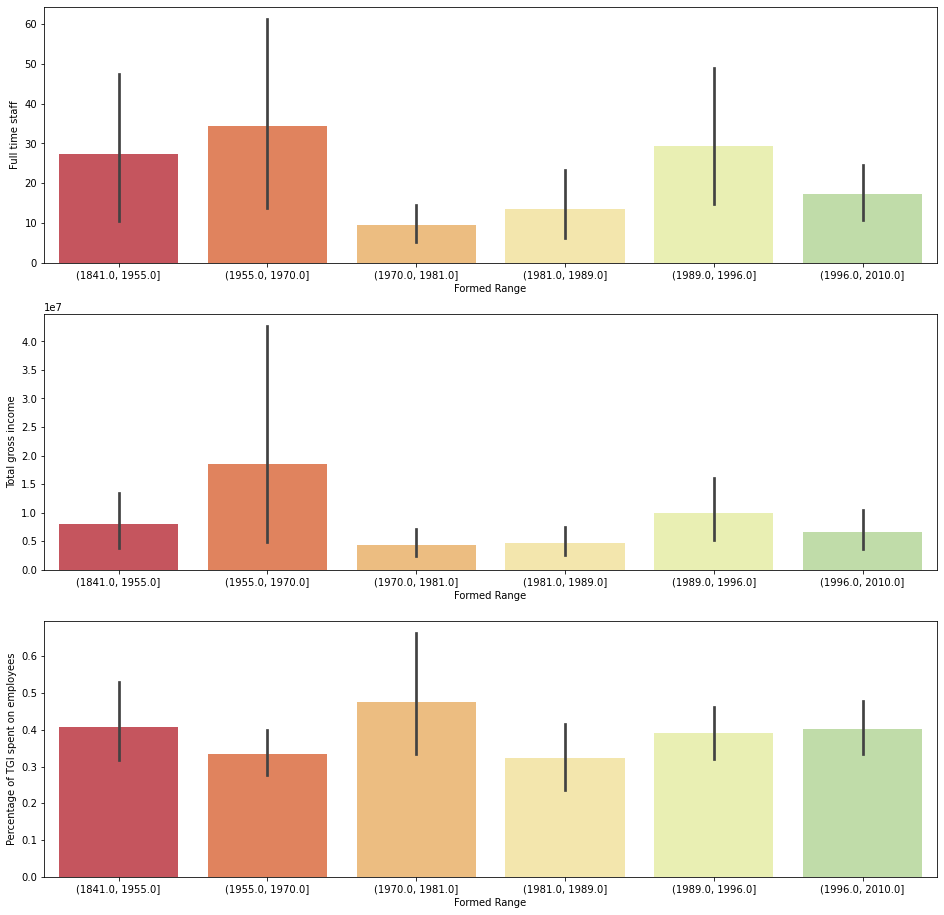

In [31]:
# Plotting by group age
plt.figure(figsize = (16,16))
plt.subplot(3,1,1)
sns.barplot(x = 'Formed Range', y ='Full time staff', data = df_formed[df_formed.loc[:,'Year'] == 2019])
plt.subplot(3,1,2)
sns.barplot(x = 'Formed Range', y ='Total gross income', data = df_formed[df_formed.loc[:,'Year'] == 2019])
plt.subplot(3,1,3)
sns.barplot(x = 'Formed Range', y ='Percentage of TGI spent on employees', data = df_formed[df_formed.loc[:,'Year'] == 2019])